<a href="https://colab.research.google.com/github/sundarbsb/machine-Learning/blob/master/ipl_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
data=pd.read_csv("/content/ipl.csv")
print(data.shape)
data.head()

(76014, 15)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [19]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [20]:
data.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [21]:
print(data['venue'].nunique())
data['venue'].value_counts()

35


M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

In [22]:
print(data['bat_team'].nunique())
data['bat_team'].value_counts()

14


Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

In [23]:
print(data['bowl_team'].nunique())
data['bowl_team'].value_counts()

14


Delhi Daredevils               10245
Royal Challengers Bangalore     9661
Mumbai Indians                  9271
Kolkata Knight Riders           9211
Kings XI Punjab                 8405
Rajasthan Royals                7773
Chennai Super Kings             6497
Deccan Chargers                 3984
Sunrisers Hyderabad             3589
Pune Warriors                   3083
Gujarat Lions                   1970
Rising Pune Supergiant           962
Kochi Tuskers Kerala             736
Rising Pune Supergiants          627
Name: bowl_team, dtype: int64

In [24]:
print(data['batsman'].nunique())
data['batsman'].value_counts()

411


SK Raina          1921
V Kohli           1825
S Dhawan          1730
RG Sharma         1726
MS Dhoni          1584
                  ... 
DT Patil             1
V Pratap Singh       1
TM Srivastava        1
AF Milne             1
NJ Rimmington        1
Name: batsman, Length: 411, dtype: int64

In [25]:
print(data['bowler'].nunique())
data['bowler'].value_counts()

329


Harbhajan Singh    1404
PP Chawla          1399
P Kumar            1386
SL Malinga         1333
UT Yadav           1304
                   ... 
RS Gavaskar           6
FY Fazal              6
CK Kapugedera         6
C Munro               6
KS Williamson         6
Name: bowler, Length: 329, dtype: int64

In [26]:
data['year']=data['date'].apply(lambda x: x.split("-")[0])
data['month']=data['date'].apply(lambda x: x.split("-")[1])
data['day']=data['date'].apply(lambda x: x.split("-")[2])
data.drop(['date'],inplace=True,axis=1)
data.head()

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,year,month,day
0,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,2008,04,18
1,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,2008,04,18
2,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,2008,04,18
3,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,2008,04,18
4,1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,2008,04,18


In [27]:
data['mid'].value_counts()

309    132
420    131
32     131
299    131
106    131
      ... 
403     91
241     74
479     65
495     63
384     50
Name: mid, Length: 617, dtype: int64

In [28]:
data['over']=data['overs'].apply(lambda x: x//1)
data['balls']=data['overs'].apply(lambda x: x-(x//1))
data.drop(['overs'],axis=1,inplace=True)
time=['year','month','day']
data[time]=data[time].astype(int)
data.dtypes

mid                 int64
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
year                int64
month               int64
day                 int64
over              float64
balls             float64
dtype: object

In [29]:
columns_to_remove = ['mid','venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(data.shape))
data.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(data.shape))

Before removing unwanted columns: (76014, 18)
After removing unwanted columns: (76014, 12)


In [30]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(data.shape))
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(data.shape))

Before removing inconsistent teams: (76014, 12)
After removing inconsistent teams: (53811, 12)


In [31]:
# Removing the first 6 overs data in every match
print('Before removing first 6 overs data: {}'.format(data.shape))
data = data[data['over']>=6.0]
print('After removing first 6 overs data: {}'.format(data.shape))

Before removing first 6 overs data: (53811, 12)
After removing first 6 overs data: (37389, 12)


In [32]:
data.dtypes

bat_team           object
bowl_team          object
runs                int64
wickets             int64
runs_last_5         int64
wickets_last_5      int64
total               int64
year                int64
month               int64
day                 int64
over              float64
balls             float64
dtype: object

In [33]:
final_data=pd.get_dummies(data=data,columns=['bat_team','bowl_team'])
print(final_data.dtypes)
final_data.head()

runs                                       int64
wickets                                    int64
runs_last_5                                int64
wickets_last_5                             int64
total                                      int64
year                                       int64
month                                      int64
day                                        int64
over                                     float64
balls                                    float64
bat_team_Chennai Super Kings               uint8
bat_team_Delhi Daredevils                  uint8
bat_team_Kings XI Punjab                   uint8
bat_team_Kolkata Knight Riders             uint8
bat_team_Mumbai Indians                    uint8
bat_team_Rajasthan Royals                  uint8
bat_team_Royal Challengers Bangalore       uint8
bat_team_Sunrisers Hyderabad               uint8
bowl_team_Chennai Super Kings              uint8
bowl_team_Delhi Daredevils                 uint8
bowl_team_Kings XI P

,runs,wickets,runs_last_5,wickets_last_5,total,year,month,day,over,balls,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,62,1,55,1,222,2008,4,18,6.0,0.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
39,63,1,52,1,222,2008,4,18,6.0,0.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
40,64,1,47,1,222,2008,4,18,6.0,0.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
41,66,1,45,1,222,2008,4,18,6.0,0.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
42,67,1,46,1,222,2008,4,18,6.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
X=final_data.drop(['total'],axis=1)
y=final_data['total']

In [35]:
X.head()

,runs,wickets,runs_last_5,wickets_last_5,year,month,day,over,balls,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,62,1,55,1,2008,4,18,6.0,0.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
39,63,1,52,1,2008,4,18,6.0,0.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
40,64,1,47,1,2008,4,18,6.0,0.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
41,66,1,45,1,2008,4,18,6.0,0.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
42,67,1,46,1,2008,4,18,6.0,0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


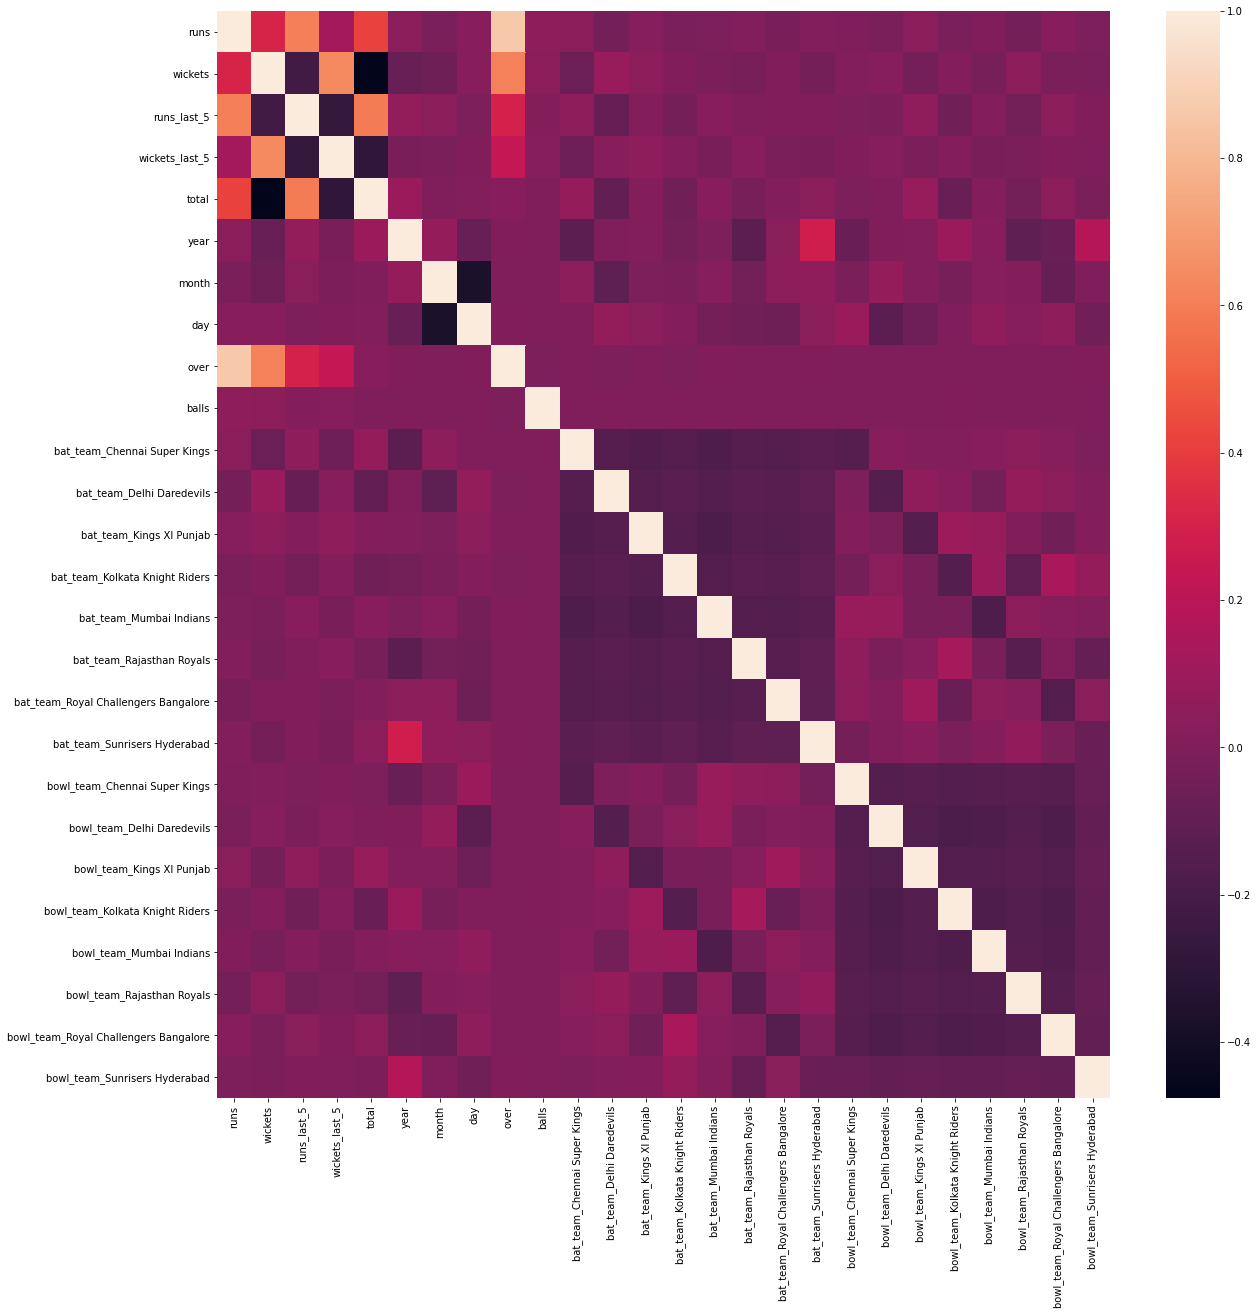

In [36]:
corrmat=final_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_data[top_corr_features].corr())

In [37]:
X.shape

(37389, 25)

Model Building

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [39]:
lin_model=LinearRegression()
dec_model=DecisionTreeRegressor()
ran_model=RandomForestRegressor()
ada_model=AdaBoostRegressor()

In [40]:
print(f"linear- {cross_val_score(lin_model,X,y,cv=5).mean()}")
print(f"decision- {cross_val_score(dec_model,X,y,cv=5).mean()}")
print(f"random- {cross_val_score(ran_model,X,y,cv=5).mean()}")
print(f"adaboost- {cross_val_score(ada_model,X,y,cv=5).mean()}")

linear- 0.6484549293049384
decision- 0.22792535967428812
random- 0.5404674122409798
adaboost- 0.479894574392526


See, here we got 65% accuracy, It's just because no predictor will predict exact score, My linear model will predict decently good in some range, lets see its mse,acc using train test split


In [41]:
# Splitting the data into train and test set
X_train = final_data.drop(labels='total', axis=1)[final_data['year'] <= 2016]
X_test = final_data.drop(labels='total', axis=1)[final_data['year'] >= 2017]

y_train = final_data[final_data['year'] <= 2016]['total'].values
y_test = final_data[final_data['year'] >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(['year','month','day'], axis=True, inplace=True)
X_test.drop(['year','month','day'], axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (34797, 22) and Test set: (2592, 22)


In [42]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

y_pred_lr = linear_regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))



---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 11.685846358057768
Mean Squared Error (MSE): 229.59404731231675
Root Mean Squared Error (RMSE): 15.152361113447526
